## MNS_Practical_Sheet 3: Visual Receptive Fields – Leonard Hollander


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter

## Exercise 1: Visual Stimulus

In [2]:
#Part (a): Approximate a Visual Field

x_0 = 5
y_0 = 5

delta_x = .1
delta_y = .1

i = np.arange(0, 2* x_0 / delta_x + 1)
j = np.arange(0, 2* x_0 / delta_x + 1)

xi, yj = np.meshgrid(-x_0 + i * delta_x, -y_0 + j * delta_y)

print(xi)
print(yj)


[[-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 ...
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]]
[[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]
 [ 5.   5.   5.  ...  5.   5.   5. ]]


Text(0.5, 1.0, 'Grid: θ = 0, K = π')

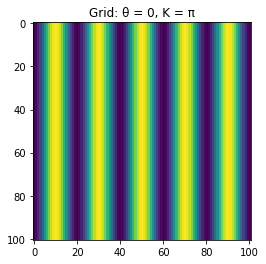

In [3]:
#Part (b): Compute the sinusoidal grating:

theta = 0
PHI = 0 
K = np.pi 
A = 1

stimulus = lambda x, y, theta, PHI, K: A * np.cos(K * x * np.cos(theta) + K * y * np.sin(theta) - PHI)


plt.imshow(stimulus(xi,yj,theta, PHI, K))
plt.title("Grid: \u03b8 = 0, K = \u03c0")





Text(0.5, 1.0, 'Grid: θ = ΰ, K = 0')

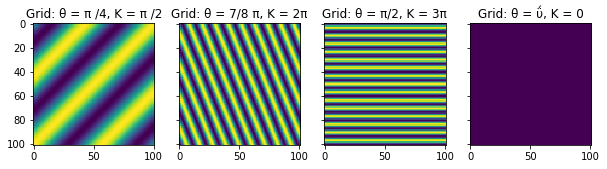

In [4]:
#Part (c): Vary the $\theta and the $\phi


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex = True, sharey = True, figsize = (10,10))

# Theta = pi/4, K = pi/2 
ax1.imshow(stimulus(xi,yj,np.pi/4, 0, np.pi/2))
ax1.set_title("Grid: \u03b8 = \u03c0 /4, K = \u03c0 /2")
# Theta = pi, K = 2pi
ax2.imshow(stimulus(xi,yj, 7/ 8*np.pi , 0, 2* np.pi))
ax2.set_title("Grid: \u03b8 = 7/8 \u03c0, K = 2\u03c0")
#Theta = pi/2, K=3pi
ax3.imshow(stimulus(xi,yj,np.pi/2, 0 , 3* np.pi))
ax3.set_title("Grid: \u03b8 = \u03c0/2, K = 3\u03c0")
#Theta = _, K = 0 – this generates a Ganzfeld
ax4.imshow(stimulus(xi,yj,np.pi/2, 0 , 0))
ax4.set_title("Grid: \u03b8 = \u03b0, K = 0")







This nicely illustrates how we can vary the stmilus dimensions to get different kinds of gratings. The first three 
stimuli will elicit differentially stronger responses in gratings with specific parameters. The last will not distinguish between receptive field tunings. It is important as a baseline comparator. See 2c.

## Exercise 2: A model of receptive fields

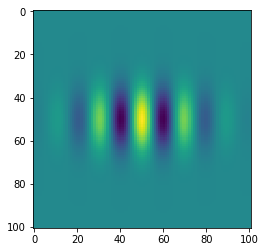

In [5]:
#Part(a):


phi = 0
k = np.pi

def gabor(x,y, phi, k, sigma_x, sigma_y):
    
    factor = (2 * np.pi * sigma_x * sigma_y)
    expo = np.exp(- x**2 / (2 * sigma_x**2) - (y**2 /  (2 * sigma_y**2)))
    
    return (expo * np.cos(k * x - phi)) / factor

rec_field = gabor(xi, yj, 0, np.pi, 2, 1)
plt.imshow(rec_field)


    

A cell with a receptive field like this would react most strongly to gratings aligned with its own spatial frequency, orientation and phase. Thus, a pattern of light bars that fall exactly within the on-regions of the visual field elicits the highest response. The cell is not a simple edge detector. It detects gratings of a specific kind. Such grating cells are complex in the sense that they integrate information from different simple cells.

In [6]:
#Part(c):

rs = lambda theta, phi, K, k: np.sum(stimulus(xi,yj, theta, phi, K) * gabor(xi,yj, phi, k, 2, 1) * delta_x * delta_y)

print('Response for spatial frequency \u03c0, and preferred frequency \u03c0:', rs(0,0, np.pi, np.pi))
print('Response for spatial frequency \u03c0, and preferred frequency 0:', rs(0,0, np.pi, 0)) 
print('Response for spatial frequency \u03c0, and preferred frequency \u03c0/2:', rs(0,0, np.pi, np.pi / 2)) 


Response for spatial frequency π, and preferred frequency π: 0.4943763994158707
Response for spatial frequency π, and preferred frequency 0: 0.0011686983076511556
Response for spatial frequency π, and preferred frequency π/2: 0.005123967889653999


<Figure size 432x288 with 0 Axes>

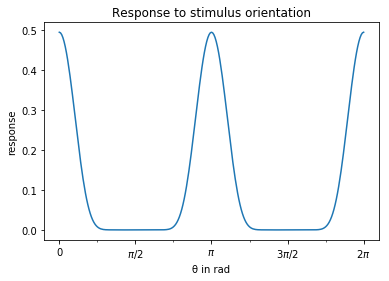

In [7]:
thetas = np.arange(0, 2 * np.pi + np.pi / 128, np.pi / 128)

#To evaluate the effect of changing the orientation, we'll have to keep $phi and $k constant:

rs_partial_theta = lambda theta: rs(theta, 0, np.pi, np.pi)
rs_theta = list(map(rs_partial_theta, thetas))

plt.figure()
fig, ax = plt.subplots()
ax.plot(thetas, rs_theta)
plt.title('Response to stimulus orientation')
plt.xlabel('\u03b8 in rad')
plt.ylabel('response')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))


def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))




This plot shows what our earlier experiments seem already to suggest. The activation is maximal, when the orientation is some multiple of $\pi$ – which is when the stimulus bars are vertically oriented – and minimal when it is a multiple of $\frac{\pi}{2}$ – which is when they are horizontally oriented.

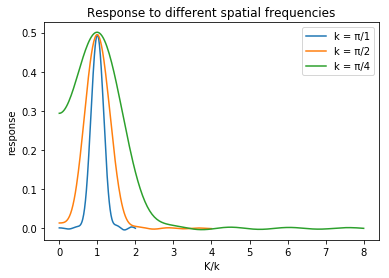

In [8]:
### Part (b):

theta = 0
phi = 0

#Let's first do it for some fixed k:

k_fix = [np.pi/a for a in [1,2,4]]
K_freqs = np.arange(0, 2 * np.pi + np.pi / 128, np.pi / 128)

for i in range (len(k_fix)):
    rs_partial_K = lambda K: rs(0, 0, K, k_fix[i])
    rs_K = list(map(rs_partial_K, K_freqs))
    plt.plot(K_freqs/k_fix[i], rs_K, label = 'k = \u03c0/{}'. format(2**i))

plt.title('Response to different spatial frequencies')
plt.xlabel('K/k')
plt.ylabel('response')
plt.legend()



Again, we find our expectations confirmed. The response is maximal when K and k are perfectly aligned. 

<Figure size 432x288 with 0 Axes>

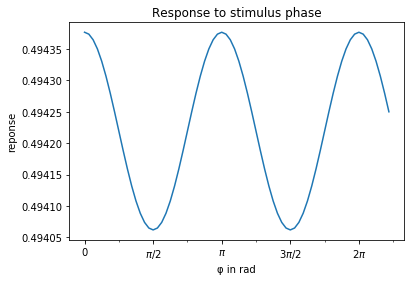

In [9]:
#Part (c):


phases = np.arange(0, 2 * np.pi + np.pi / 4, np.pi / 32)
rs_partial_phi = lambda phi: rs(theta, phi, K, k)
rs_phi = list(map(rs_partial_phi, phases))

plt.figure()

fig, ax = plt.subplots()
ax.plot(phases, rs_phi)
ax.set_title('Response to stimulus phase')
ax.set_xlabel('\u03c6 in rad')
ax.set_ylabel('reponse')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

This is also what we should have come to expect. Changing the phase by any multiple of $\pi$ will just realign the light bars in the original image with the receptive field. For any such phase shift the activation should thus be maximal. However, when we between such optima by any multiple $\frac{\pi}{2}$, then the light bars take the position of the dark bars in the original image and the activity becomes minimal. 

## Bonus Exercise: Image Filtering

[[[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]

 [[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]

 [[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]

 ...

 [[0.32941177 0.07058824 0.23529412]
  [0.32941177 0.07058824 0.23529412]
  [0.36078432 0.10588235 0.22745098]
  ...
  [0.6784314  0.28627452 0.32941177]
  [0.6745098  0.26666668 0.29803923]
  [0.69411767 0.24313726 0.30980393]]

 [[0.32156864 0.08627451 0.22352941]
  [0.32156864 0.08627451 0.22352941]


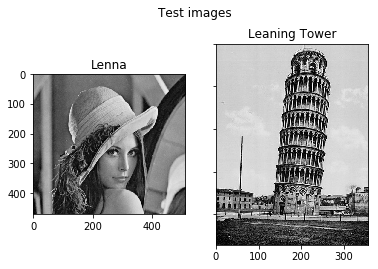

In [10]:
from skimage.color import rgb2gray


lenna = plt.imread('lenna.png')
pisa = rgb2gray(plt.imread('Leaning Tower.jpg'))
grey_lenna = rgb2gray(lenna)
fig, axs = plt.subplots(1,2, sharey = True)

print(lenna)

plt.suptitle('Test images')
axs[0].set_title('Lenna')
axs[0].imshow(grey_lenna, cmap = 'gray')
axs[1].set_title('Leaning Tower')
axs[1].imshow(pisa, cmap = 'gray')


<Figure size 432x288 with 0 Axes>

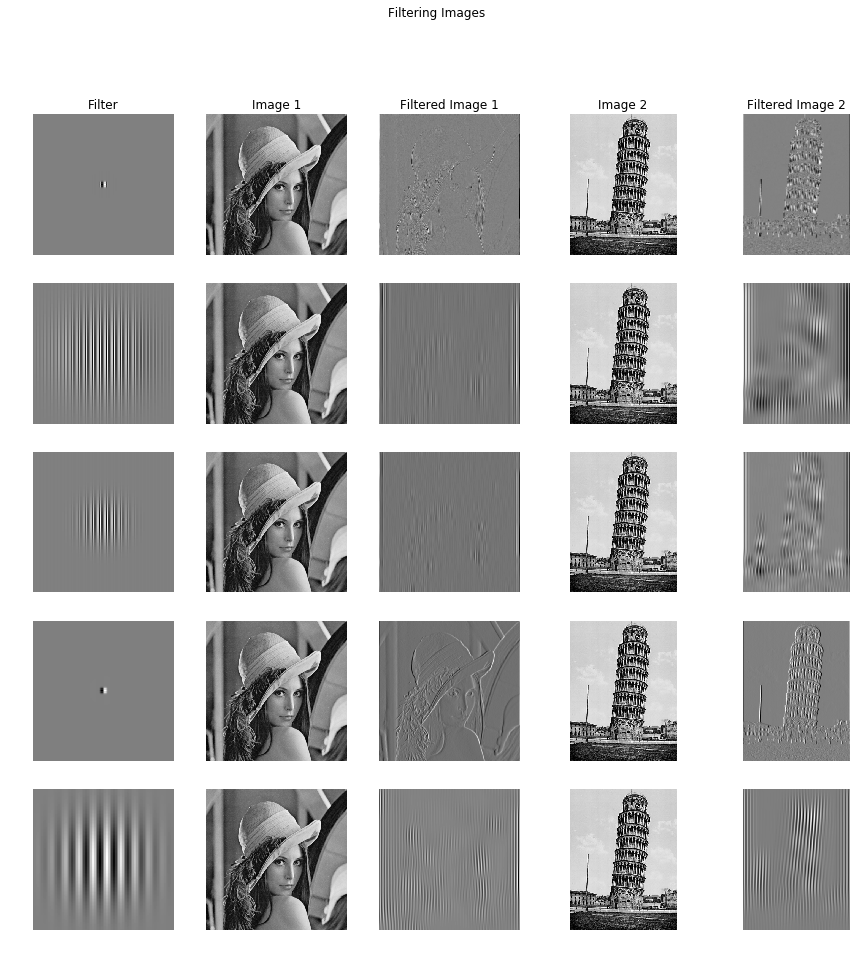

In [11]:
import scipy.signal as sp

grid_x = np.linspace(-5, 5, grey_lenna.shape[0])
grid_y = np.linspace(-5, 5, grey_lenna.shape[1])

xk = 0
yl = 0


lenna_gabor = gabor(xi - xk, yj - yl, np.pi / 2, 8 * np.pi, .125, .125)


lenna_conv = sp.fftconvolve(grey_lenna, lenna_gabor, 'same')

gabor_list = [gabor(xi - xk, yj - yl, np.pi / 2, a * np.pi, 1 / b, 1 / b) for a in [8,2] for b in [8,.5,1]]

plt.figure()

fig, axs = plt.subplots(5,5, sharex = False, sharey = False, figsize = (15,15))

plt.suptitle('Filtering Images')

for i in range (5):
    
    axs[i,1].imshow(grey_lenna, cmap = 'gray')
    axs[i,1].axis('off')
    axs[i,2].imshow(sp.fftconvolve(grey_lenna, gabor_list[i], 'same'), cmap = 'gray')
    axs[i,2].axis('off')
    axs[i,0].imshow(gabor_list[i], cmap = 'gray')
    axs[i,0].axis('off')
    axs[i,3].imshow(pisa, cmap = 'gray')
    axs[i,3].axis('off')
    axs[i,4].imshow(sp.fftconvolve(pisa, gabor_list[i], 'same'), cmap = 'gray')
    axs[i,4].axis('off')
    
    
    axs[0,0].set_title('Filter')
    axs[0,1].set_title('Image 1')
    axs[0,2].set_title('Filtered Image 1')
    axs[0,3].set_title('Image 2')
    axs[0,4].set_title('Filtered Image 2')

plt.show()

By convolving the filter with our image, we are able to finally see the filter in action.  Trying out different filters confirms the earlier intuition that the filter under consideration (1st row) is indeed an edge detector. Other detectors (in particular filters with higher variance in both the x and the y direction) pick up gratings rather than fine edges.